# Verification of bias in the calculation of Variance for Gaussian Distribution

For a dataset of n sample of random variable x, denoted by X = [x1, x2, ... xn], each independently sampled from the normal distribution with mean µ and variance $\sigma^2$.

We can estimate from the dataset with the respective formula:

$$µ = \frac{x1 + x2 + ... + xN}{N}$$

$$\sigma^2 = \frac{\sum_{n=1}^{N}{(xn - µ)}}{N}$$

While, the mean we predict tends to be unbiased, the variance is biased. The bias in variance seems to be dependent on the dataset size.

To predict the true variance, we need to scale the variance we got by the following factor.

$$\text{Scale factor (k)} = \frac{N}{N-1}$$

$$\text{True variance = k * sample variance}$$

This is the claim, I want to verify in this notebook.

Todo:
- [x] Generate many datasets of different sizes.
- [x] Calculate variance for each cases.
- [x] Take the mean for each size.
- [x] Compare it with n/(n-1) scaled variances

If you take a distributions with variances already 1, job becomes a lot easier.

Variance expectations for different dimensions:
[0.         0.50269695 0.66745995 0.74334066 0.79912726 0.8329304
 0.85594991 0.87169927 0.8983032  0.89697819 0.91787718 0.91323883
 0.92229375 0.9284862  0.93129314 0.93345225 0.93682508 0.94541588
 0.94596671 0.94922966]
Mathematical inverse scale factors:
[0.         0.5        0.66666667 0.75       0.8        0.83333333
 0.85714286 0.875      0.88888889 0.9        0.90909091 0.91666667
 0.92307692 0.92857143 0.93333333 0.9375     0.94117647 0.94444444
 0.94736842 0.95      ]


Text(0.5, 1.0, 'Variance expectation vs Number of dimensions')

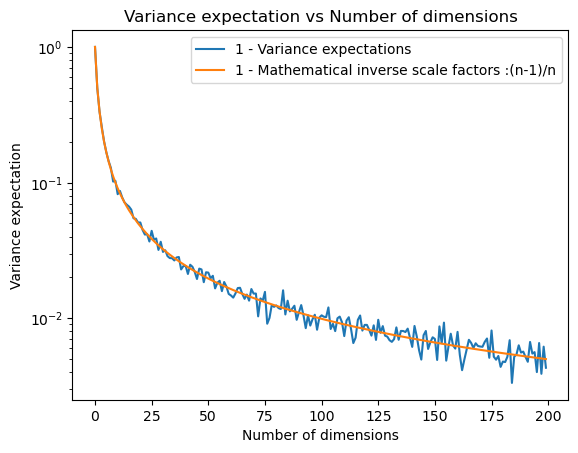

In [1]:
import numpy as np 

variance_expectations = []

# checking up to 200 dimensions
dataset_size = 200
for i in range(1, dataset_size + 1):
    N_experiments = 10000 # Number of experiments for each size of dataset
    data = np.random.randn(N_experiments, i)
    means = (np.sum(data, axis=-1) / i).reshape(N_experiments, 1)

    # Calculate the variance for each experiment
    variances = np.einsum("ij->i", (data - means) ** 2) / i
    variance_expectations.append(np.mean(variances))
variance_expectations = np.array(variance_expectations)

print("Variance expectations for different dimensions:")
print(variance_expectations[:20])

# Calculate the scale factors n/(n-1) for each dataset size in reciprocal form.
mathematical_inverse_scale_factors = np.vectorize(lambda x: (x-1) / x)(np.arange(1, dataset_size + 1))
print("Mathematical inverse scale factors:")
print(mathematical_inverse_scale_factors[:20])

import matplotlib.pyplot as plt
# Subtracting from 1 before plotting so that values diminishing towards 1, actually diminishes towawrds 0.
plt.plot(1-variance_expectations, label="1 - Variance expectations")
plt.plot(1-mathematical_inverse_scale_factors, label="1 - Mathematical inverse scale factors :(n-1)/n")
plt.xlabel("Number of dimensions")
plt.ylabel("Variance expectation")

# Log scale allows us to see the diminishing effect more clearly
plt.yscale("log")
plt.legend()
plt.title("Variance expectation vs Number of dimensions")

However, the such bias disappears if we have access to the true population mean.

So, if we calculate the mean with respect of true mean, the expectation for the variance should be same, regardless of the size of the dataset.

Variance expectations for different dimensions:
[1.00221109 0.99247482 0.99287641 1.00222613 1.0059303  0.99357979
 1.00082208 1.00631266 1.00173325 0.99667836 0.99645534 0.997218
 1.00559569 1.00099939 1.00225624 1.00209414 0.99898154 0.99486148
 1.00090836 0.9980922 ]


Text(0.5, 1.0, 'Variance expectation vs Number of dimensions')

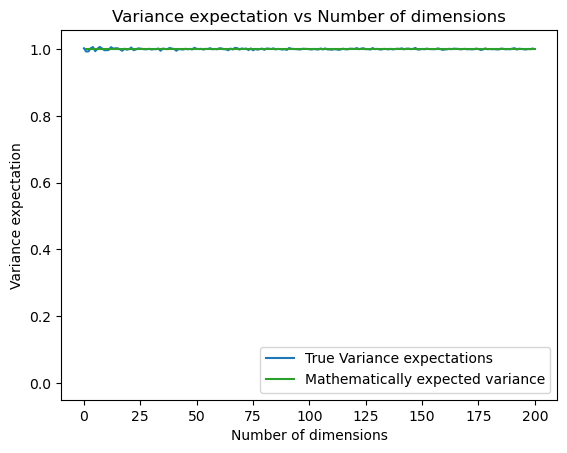

In [2]:
import numpy as np 

variance_expectations = []

# checking up to 200 dimensions
dataset_size = 200
for i in range(1, dataset_size + 1):
    N_experiments = 10000 # Number of experiments for each size of dataset
    data = np.random.randn(N_experiments, i)
    true_means = np.zeros((N_experiments, 1))

    # Calculate the variance for each experiment
    variances = np.einsum("ij->i", (data - true_means) ** 2) / i
    variance_expectations.append(np.mean(variances))
variance_expectations = np.array(variance_expectations)

print("Variance expectations for different dimensions:")
print(variance_expectations[:20])

import matplotlib.pyplot as plt
# Subtracting from 1 before plotting so that values diminishing towards 1, actually diminishes towawrds 0.
plt.plot(variance_expectations, label="True Variance expectations")
plt.xlabel("Number of dimensions")
plt.ylabel("Variance expectation")
plt.plot(0,0)
plt.plot(np.arange(1, dataset_size + 1), np.ones(dataset_size), label="Mathematically expected variance")
plt.legend()
plt.title("Variance expectation vs Number of dimensions")

Furthermore, there exists a **Law of Total Variance**, which states:

$Var(X) = E(Var(X | Y)) + Var(E(X | Y))$

This is also known as the variance decomposition formula, conditional variance forumla.

This states variance of a variable can be decomposed into two parts:
1. Expected value of the process variance (EVPV): $E(X | Y)$
2. Variance of the hypothetical means (VHM): $Var(E(X|Y))$


For calculation of the first part:
1. Calculate variance for each experiment
2. Calculate average of it.

For calculation of the second part:
1. Calculation mean for each experiment.
2. Calculate variance for the mean.

For calculation of true mean:
Add the first and second mean.

I hope to see the true variance regardless of the experiment size.

Text(0.5, 1.0, 'Variance expectation vs Number of dimensions')

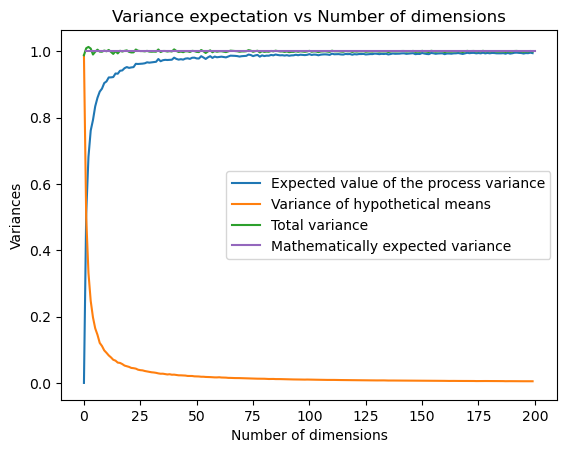

In [1]:
import numpy as np 

variance_expectations = []
variance_of_hypothetical_means = []

# checking up to 200 dimensions
dataset_size = 200
for i in range(1, dataset_size + 1):
    N_experiments = 10000 # Number of experiments for each size of dataset
    data = np.random.randn(N_experiments, i)
    means = (np.sum(data, axis=-1) / i).reshape(N_experiments, 1)

    variances = np.einsum("ij->i", (data - means) ** 2) / i

    # Expected value of the process variable
    variance_expectations.append(np.mean(variances))

    # Variance of the Hypothetical mean
    means = means.reshape(N_experiments)
    means_mean = np.sum(means, axis=0) / N_experiments
    means_variance = np.sum((means - means_mean) ** 2) / N_experiments
    variance_of_hypothetical_means.append(means_variance)

    
variance_expectations = np.array(variance_expectations)
variance_of_hypothetical_means = np.array(variance_of_hypothetical_means)

import matplotlib.pyplot as plt
# Subtracting from 1 before plotting so that values diminishing towards 1, actually diminishes towawrds 0.
plt.plot(variance_expectations, label="Expected value of the process variance")
plt.plot(variance_of_hypothetical_means, label="Variance of hypothetical means")
plt.plot(variance_expectations+variance_of_hypothetical_means, label="Total variance")
plt.xlabel("Number of dimensions")
plt.ylabel("Variances")
plt.plot(0,0)
plt.plot(np.arange(1, dataset_size + 1), np.ones(dataset_size), label="Mathematically expected variance")
plt.legend()
plt.title("Variance expectation vs Number of dimensions")